## 🟢 Import bibliotek i wczytanie danych

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Wczytanie danych
dataset = pd.read_csv(r'C:\Magisterka\Predicting-the-results-of-Premier-League-matches\TESTING_DATASET_3\Dataset_Ready\final_dataset_3.csv')
dataset.head()


,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,14/08/10,Aston Villa,West Ham,3,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,14/08/10,Blackburn,Everton,1,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,14/08/10,Bolton,Fulham,0,0,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,14/08/10,Chelsea,West Brom,6,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,14/08/10,Sunderland,Birmingham,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


## 2. Przygotowanie danych (bez usuwania HomeTeam i AwayTeam)

In [2]:

X_all = dataset.drop(columns=['FTR', 'Date'])
y_all = dataset['FTR']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

# Kodowanie zmiennych kategorycznych
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

# Dopasowanie kolumn X_test do X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


## Model Regresji Logistycznej z optymalizacją GridSearchCV

In [3]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=0),
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry: ", grid_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Najlepsze parametry:  {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


## Ocena modelu

In [4]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Raport klasyfikacji
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           H       1.00      1.00      1.00       336
          NH       1.00      1.00      1.00       424

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



## Wizualizacje wyników

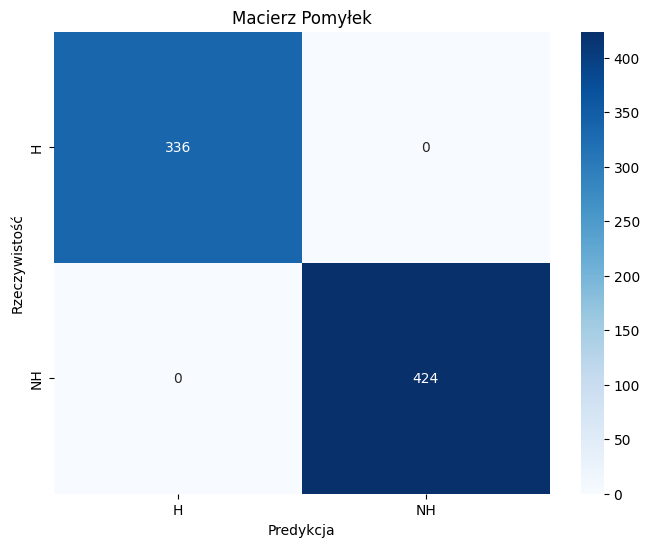

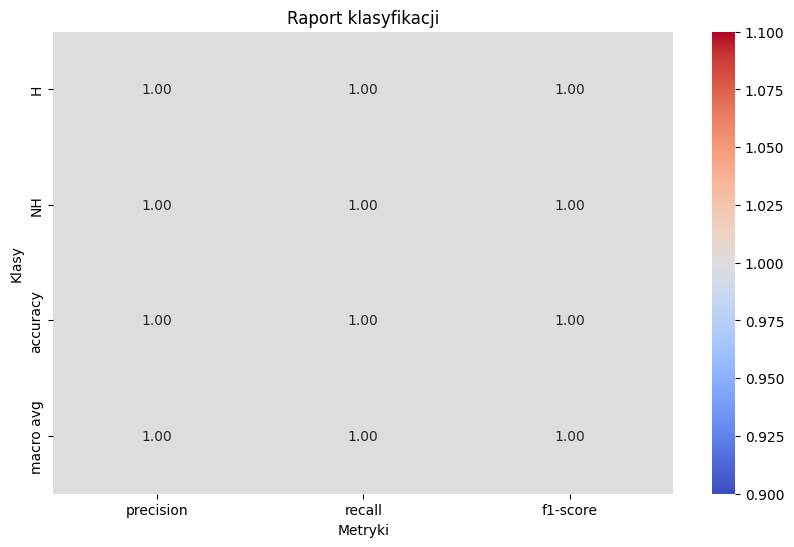

In [5]:

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.xlabel('Predykcja')
    plt.ylabel('Rzeczywistość')
    plt.title('Macierz Pomyłek')
    plt.show()

def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt='.2f')
    plt.title("Raport klasyfikacji")
    plt.xlabel("Metryki")
    plt.ylabel("Klasy")
    plt.show()

plot_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)
